## 🔍 Interactive Visualization of the Convolution Integral

This interactive example helps you understand what convolution **really means** by stepping through the calculation of the output $y(t)$ at one point in time.

We use the convolution integral:

$$
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \, d\tau
$$

Instead of plotting the entire output signal all at once, this tool focuses on a **single time point $t$** that you can control using the slider.

For each value of $t$, you’ll see:

1. **The fixed input signal** $x(\tau)$: a rectangular pulse.
2. **The impulse response** $h(t - \tau)$: flipped and shifted to align with the current $t$.
3. **Their pointwise product** $x(\tau) \cdot h(t - \tau)$: shown with shaded area.
4. **The output value $y(t)$**: computed as the area under the product, and displayed as a stem plot.

### 🧠 What You'll Learn

- How the output at time $t$ depends on **past input values**.
- Why the convolution integral includes a **flipped** and **shifted** version of the impulse response.
- How the system "builds up" its output by **integrating overlapping contributions** from the input and impulse response.

Use the slider to explore how the overlap changes as $h(t - \tau)$ slides across the input signal — and how that affects the system's output at each time point.


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define input signal x(t) and impulse response h(t)
def x(t):
    return np.where((t >= 0) & (t <= 2), 1.0, 0.0)

tau = np.linspace(-1, 5, 1000)

def h(t):
    return  np.exp(-t/1) * np.where(t >= 0, 1.0, 0.0)


In [4]:
def plot_convolution(t_slider):
    flipped_shifted_h = h(t_slider - tau)
    xtau = x(tau)
    product = xtau * flipped_shifted_h
    y_t = np.trapezoid(product, tau)

    plt.figure(figsize=(12, 10))

    plt.subplot(4, 1, 1)
    plt.plot(tau, h(tau), label='h(t)', linewidth=2)
    plt.title('Impulse Response h(t)')
    plt.ylabel('Amplitude') 
    plt.grid(True)
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(tau, xtau, label='x(τ)', linewidth=2)
    plt.plot(tau, flipped_shifted_h, '--', label='h(t - τ)', linewidth=2)
    plt.title(f'x(τ) and h(t - τ) at t = {t_slider:.2f}')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(tau, product, label='x(τ)·h(t - τ)', color='purple', linewidth=2)
    plt.fill_between(tau, 0, product, color='purple', alpha=0.3)
    plt.ylabel('Product')
    plt.grid(True)
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.stem([t_slider], [y_t], linefmt='C3-', markerfmt='C3o', basefmt='k')
    plt.ylabel('y(t)')
    plt.xlabel('t')
    plt.title(f'y(t) = ∫ x(τ)·h(t - τ) dτ = {y_t:.3f}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

interact(plot_convolution, t_slider=FloatSlider(value=0.0, min=-1.0, max=5.0, step=0.1))


interactive(children=(FloatSlider(value=0.0, description='t_slider', max=5.0, min=-1.0), Output()), _dom_class…

<function __main__.plot_convolution(t_slider)>

## 🔁 Why Is There a "Flip" in Convolution?

The convolution integral is defined as:

$$
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \, d\tau
$$

This expression shifts the impulse response $h(\tau)$ by $t$ to become $h(t - \tau)$. But many textbooks and instructors say convolution involves **flipping**. Why?

---

### 🧠 Where the Flip Comes From

Let’s do a change of variable:

Let $\lambda = t - \tau$, which implies $\tau = t - \lambda$ and $d\tau = -d\lambda$.

Substitute into the convolution integral:

$$
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \, d\tau
= \int_{-\infty}^{\infty} x(t - \lambda) \cdot h(\lambda) \cdot (-d\lambda)
$$

Flip the integration limits and absorb the negative sign:

$$
y(t) = \int_{\infty}^{-\infty} x(t - \lambda) \cdot h(\lambda) \, d\lambda 
$$

This is the same operation — just rewritten — and now it looks like we’re **sliding a flipped version of $h$** across $x$.

---

### ✅ What’s Actually Happening

- When we compute $h(t - \tau)$, we’re **shifting** the impulse response by $t$.
- But the full convolution process **mimics a flip**, because we’re essentially aligning $h(\tau)$ with reversed time before shifting.

So even though $h(t - \tau)$ is just a shift in code, **it behaves as if you flipped $h(\tau)$ and slid it across $x(\tau)$**.

---

### 🔄 Convolution vs Cross-Correlation

| Operation           | Formula                              | Flip Involved? |
|--------------------|--------------------------------------|----------------|
| Convolution        | $x * h = \int x(\tau) h(t - \tau) d\tau$ | ✅ Yes — flip and shift |
| Cross-correlation  | $\int x(\tau) h(t + \tau) d\tau$         | ❌ No flip      |

This is why convolution and correlation are **similar but not the same**.

---

### 🧩 Summary

- The function $h(t - \tau)$ itself is just a **shift**.
- The **flip** is a conceptual result of how convolution aligns and accumulates overlaps between signals.
- You **see the flip** when comparing convolution to cross-correlation, or when writing convolution as a sum of reversed impulse responses.



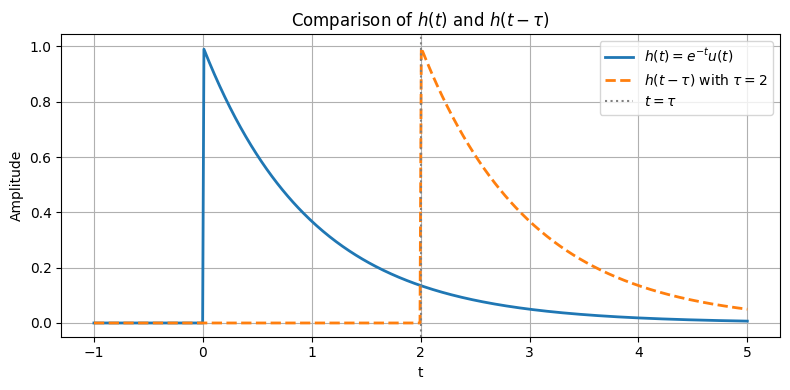

In [5]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-1, 5, 500)
tau = 2  # try changing this value

h = np.exp(-t) * (t >= 0)
h_shifted = np.exp(-(t - tau)) * (t >= tau)

plt.figure(figsize=(8, 4))
plt.plot(t, h, label=r'$h(t) = e^{-t}u(t)$', linewidth=2)
plt.plot(t, h_shifted, '--', label=fr'$h(t - \tau)$ with $\tau = {tau}$', linewidth=2)
plt.axvline(tau, color='gray', linestyle=':', label=r'$t = \tau$')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.title('Comparison of $h(t)$ and $h(t - \\tau)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
